In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
altura_en_m = df['height'] / 100
df['BMI'] = (df['weight']) / (altura_en_m ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
mask = df[['cholesterol', 'gluc']] == 1
df[mask] = 0

mask = df[['cholesterol', 'gluc']] > 1
df[mask] = 1

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [24]:
df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat_total = pd.DataFrame(columns = ['cardio', 'variable', 'value'])

for i in df_cat.variable.unique():
    df_nueva = df_cat[df_cat['variable'] == i]
    df_nueva = pd.DataFrame(df_nueva.value_counts())
    df_nueva = df_nueva.reset_index()
    df_cat_total = pd.concat([df_cat_total, df_nueva])

df_cat_total.rename(columns = {0: 'total'}, inplace = True)

,cardio,variable,value,total
0,0,cholesterol,0,29330.0
1,1,cholesterol,0,23055.0
2,1,cholesterol,1,11924.0
3,0,cholesterol,1,5691.0
0,0,gluc,0,30894.0
1,1,gluc,0,28585.0
2,1,gluc,1,6394.0
3,0,gluc,1,4127.0
0,1,smoke,0,32050.0
1,0,smoke,0,31781.0


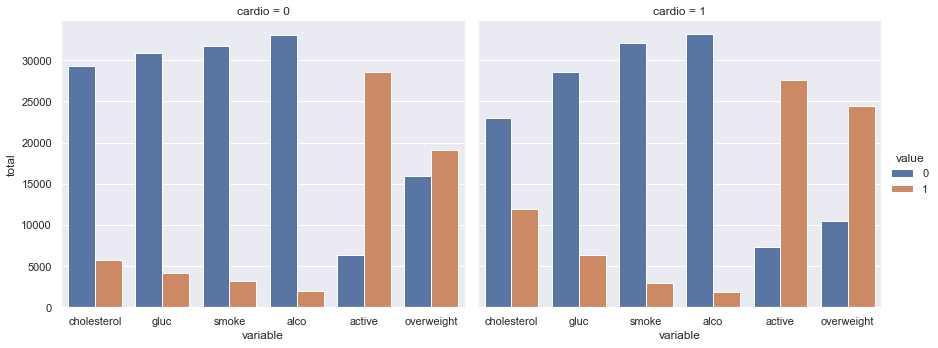

In [25]:
sns.catplot(data = df_cat_total, x = 'variable', y = 'total', hue = 'value', col = 'cardio', 
            kind = 'bar', height = 5, aspect = 1.25)

C:\Users\Hp paviolion 360\AppData\Local\Temp\ipykernel_20192\1122163483.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

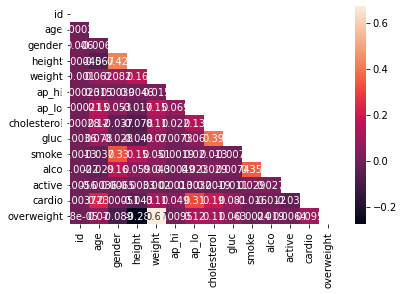

In [22]:
# Clean the data. Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

mask_diastolic = df['ap_lo'] <= df['ap_hi']

mask_height_1 = df['height'] >= df['height'].quantile(0.025)
mask_height_2 = df['height'] <= df['height'].quantile(0.975)

mask_weight_1 = df['weight'] >= df['weight'].quantile(0.025)
mask_weight_2 = df['weight'] <= df['weight'].quantile(0.975)

mask_total = (mask_diastolic) & (mask_height_1) & (mask_height_2) & (mask_weight_1) & (mask_weight_2)

df = df[mask_total]

df_corr = df.corr()
df_corr.drop('BMI', inplace = True)
df_corr.drop('BMI', axis = 1, inplace = True)

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

<AxesSubplot:>

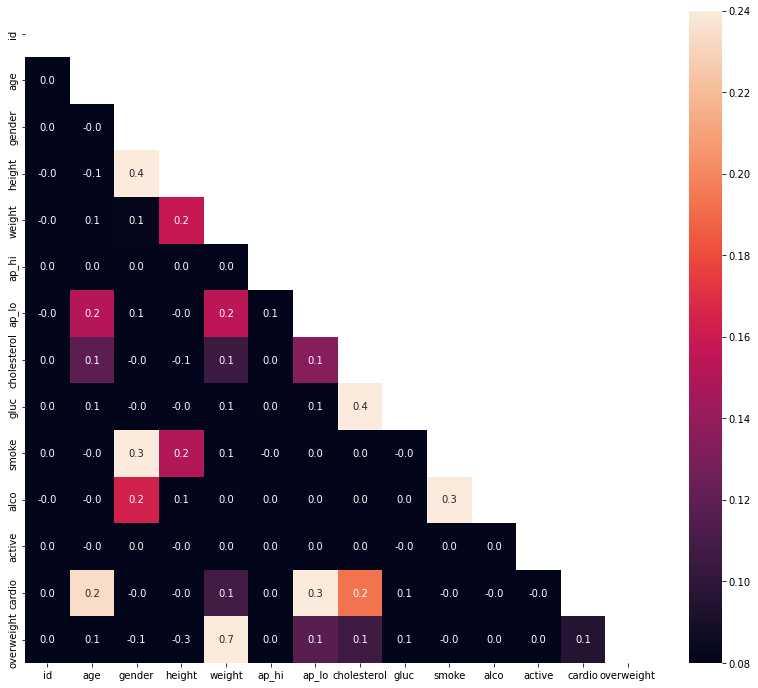

In [29]:
fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(df_corr, mask = mask, annot = True, fmt = '.1f', vmin = 0.08, vmax = 0.24)